In [ ]:
# # Install required packages if you don't have them yet
# install.packages("readxl")
# install.packages("ggplot2")
# Install necessary packages if not installed
# install.packages("tm")
# install.packages("wordcloud")


In [3]:
# Load the packages
library(readxl)
library(ggplot2)
library(tm)
library(wordcloud)

In [4]:
# Load your Excel file
data <- read_excel("../../Data/Extracted Sections/Attribute_Papers (1).xlsx", sheet="Identified Themes")

# Check the structure of the data
head(data)

File Name,Themes
<chr>,<chr>
Environment- The Path of Global Environmental Governance – Form and Function in Historical Perspective.pdf,"Global Environmental Governance, Challenges in Global Environmental Governance, Global Power Shifts and Geopolitics, Scientific Research"
INTERGOVERNMENTAL ORGANIZATIONS (IGOS) AND THEIR ROLES AND ACTIVITIES IN SECURITY ECONOMY HEALTH AND ENVIRONMENT_E_ref.pdf,"Global Environmental Governance, Institutional Design and Governance Structures, Climate Change and Policy Integration, Public Health and Security, Scientific Research"
“Privatisation_’ in the United Nations system_.pdf,"Global Environmental Governance, Sustainability and Development, Scientific Research"
A Changing United Nations_Multilateral Evolution and the Quest for Global Governance.pdf,"Global Environmental Governance, Climate Change and Policy Integration, Sustainability and Development, Challenges in Global Environmental Governance, Global Power Shifts and Geopolitics, Public Health and Security, Effectiveness of Global Environmental Policies, Scientific Research"
A typology of board design for highly effective monitoring in intergovernmental_Federo.pdf,"Global Environmental Governance, Climate Change and Policy Integration, Challenges in Global Environmental Governance, Technological Innovation in Governance, Scientific Research"
A World Environment Organization_Solution.pdf,"Global Environmental Governance, Climate Change and Policy Integration, Sustainability and Development, Challenges in Global Environmental Governance, Public Health and Security"


Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
“transformation drops documents”


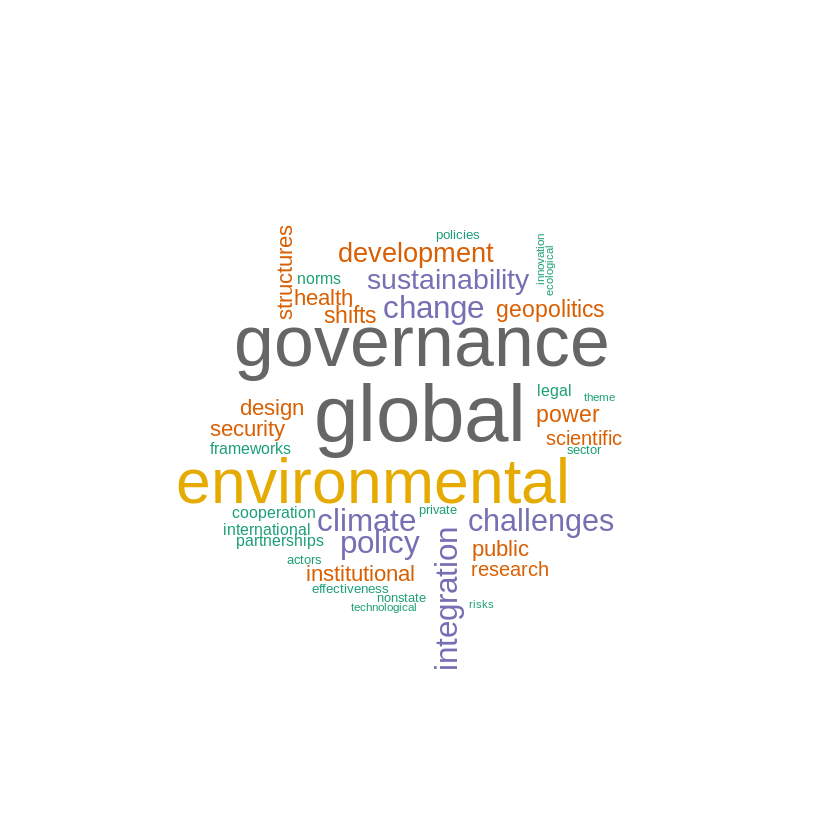

In [5]:
# Assuming another column contains text or keywords
corpus <- Corpus(VectorSource(data$Themes))  # Adjust to your keyword column

# Clean the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

# Create the term-document matrix
term_matrix <- TermDocumentMatrix(corpus)
m <- as.matrix(term_matrix)
word_freqs <- sort(rowSums(m), decreasing = TRUE)

# Create a word cloud
wordcloud(names(word_freqs), word_freqs, max.words = 100, random.order = FALSE, colors = brewer.pal(8, "Dark2"))
